# UW DSC Time Series Forecasting Workshop
###  By: Matthew Erxleben

Lets import some important libraries we will need for this workshop

In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA 

Lets load in some sample data from Kaggle to do our time series analysis and forecasting with.

In [107]:
df = pd.read_csv('C:/Users/matth/OneDrive/Desktop/UW Data Science Club/Time series forecasting Workshop/data.csv')

Here we have a data set that is historical data of a value from 1991 to 2008. As we can see, we have 2 columns. One being the the date, and the other being a value. This is a time series. 

In [108]:
df.head(10)

,date,value
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221
3,1991-10-01,3.611003
4,1991-11-01,3.565869
5,1991-12-01,4.306371
6,1992-01-01,5.088335
7,1992-02-01,2.814520
8,1992-03-01,2.985811
9,1992-04-01,3.204780


In [109]:
df.tail(10)

,date,value
194,2007-09-01,22.930357
195,2007-10-01,23.263340
196,2007-11-01,25.250030
197,2007-12-01,25.806090
198,2008-01-01,29.665356
199,2008-02-01,21.654285
200,2008-03-01,18.264945
201,2008-04-01,23.107677
202,2008-05-01,22.912510
203,2008-06-01,19.431740


<function matplotlib.pyplot.show(close=None, block=None)>

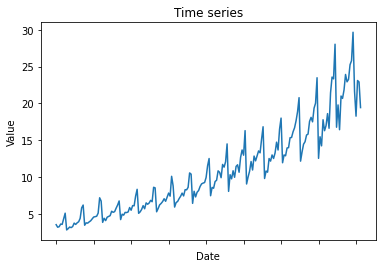

In [110]:
plt.plot(df.value)
plt.title('Time series')
plt.ylabel('Value')
plt.xlabel('Date')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show

As we can see, the time series has trend and is not stationary. We can use the .diff() function to take the first order difference of the time series

<function matplotlib.pyplot.show(close=None, block=None)>

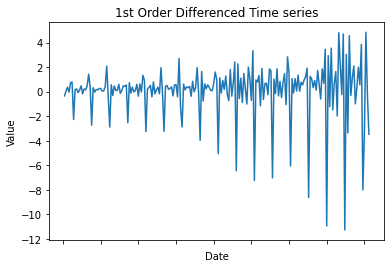

In [111]:
plt.plot(df.value.diff())
plt.title('1st Order Differenced Time series')
plt.ylabel('Value')
plt.xlabel('Date')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

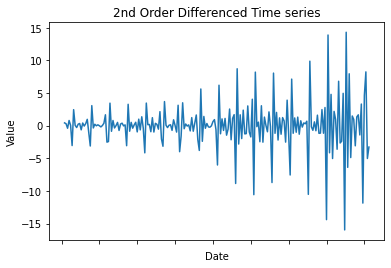

In [112]:
plt.plot(df.value.diff().diff())
plt.title('2nd Order Differenced Time series')
plt.ylabel('Value')
plt.xlabel('Date')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.show

The time series is now near stationary as we can see from the graph

We can use the PACF to see how many AR terms to use (number of lags)

<function matplotlib.pyplot.show(close=None, block=None)>

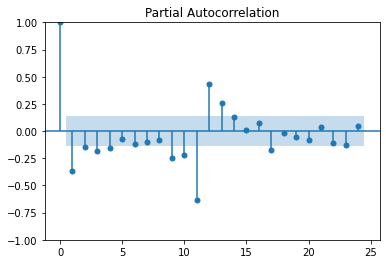

In [113]:
plot_pacf(df.value.diff().dropna(), method='ywm')
plt.show

As we can see, lag 1 is very sigificant as it is way outside the bounds. Therefore we can use 1 lag (p = 1) for our model

We can use the ACF to see how many MA terms to use (number of lagged forecast errors)

<function matplotlib.pyplot.show(close=None, block=None)>

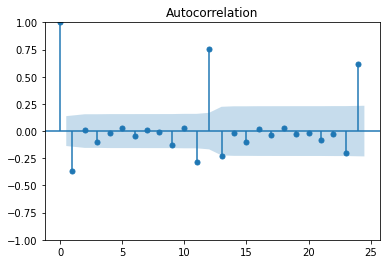

In [114]:
plot_acf(df.value.diff().dropna())
plt.show

As we can see, using 1 is very sigificant as it is way outside the bounds. Therefore we can use q = 1 for our model

<function matplotlib.pyplot.show(close=None, block=None)>

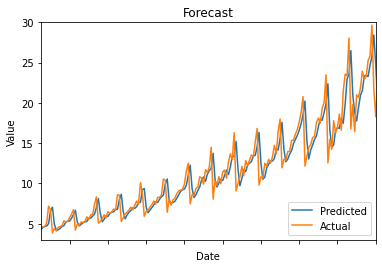

In [115]:
arima_model = ARIMA(df.value, order=(1,2,1))
model = arima_model.fit()
results = model.predict()

plt.plot(results)
plt.plot(df.value)
plt.title('Forecast')
plt.ylabel('Value')
plt.xlabel('Date')
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
plt.xlim([25, 200])
plt.ylim([3, 30])

plt.legend(["Predicted", "Actual"], loc ="lower right")
plt.show



As we can see, the forecast is pretty accurate in comparison to the actual data. This is using an ARIMA model of p=1, d=2, q=1